**Introduction and EDA**


As outlined in the project scoping document, our task is to predict the sales price of houses as accurately as possible using a multivariate linear regression.

Our approach will involve the following steps:

1) Hypothesising about the data - without looking at the data in any detail, thinking about which features may influence our target (sales price)

2) Carrying out initial exploratory analysis to get a feel for the data and plotting our first charts to explore whether the features we hypothesised about are meaningful and whether their influence on sales price is worth exploring further

3) Cleaning the data, based on the features we are interested in exploring (meaning it will be easier to manipulate), getting rid of any outliers and dropping null values or replacing them with meaningful or placeholder values instead

4) Undertaking linear regression using different features to see which (combination) most accurately predicts sales price.

We have decided to approach the question as an estate agent. We will be exploring two questions for clients who wish to sell their property through us and one question for clients who wish to buy a property through us.

**Step 1: Hypotheses about our data**

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns

df = pd.read_csv("kc_house_data.csv")

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Hypotheses to investigate**

Given the overview of the data we have available, we are interested in the following:

- waterfront houses

- houses with high grades

- houses in the north and south of the city.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


The .info() function gives us a concise summary of our table - we can see that there are 21597 rows of data (entries or houses). However, it also tells us that three of the features are missing values: waterfront; view; and year renovated. We will need to decide if what to do with these missing values if we are interested in investigating these factors further.

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Using the describe function gives us a statistical description of the dataframe. We can easily spot outliers, trends and patterns for our dataset as a whole. From it we can tell, for example, that:
- the most expensive house, which costs over USD 7 million, seems to be an outlier, given that the average house price is USD 500000
- there is a house with 33 bedrooms, which seems huge (it might be an outlier, or a mistake)
- most houses don't have a waterfront view (assuming '1' means the house has a waterfront view; we can investigate this further below)
- the grades given to houses in our dataset run from 3 to 13 (although we can assume that the grading system runs from 1 to 13 - we still don't know what these grades represent)
- the mean year when houses in the dataset were built is 1970.

**Step 2: EDA and the factors we are interested in**

We are interested in the following initial factors:

- waterfront houses

- houses with high grades

- houses in the north and south of the city.

Firstly, we can use .corr() to get an overview of which factors are correlated. Using .corr() with our dataframe will return the pairwise correlation for all columns in our dataframe.

In [10]:
correlations_initial = df.corr()
correlations_initial

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


The above gives us the pairwise correlation for all columns in the dataframe. Any null values are automatically excluded from the output. The closer the correlation coefficient is to 1, the stronger the strength of association is between two features.

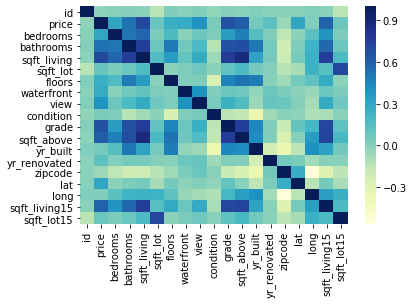

In [11]:
ax = sns.heatmap(correlations_initial, cmap="YlGnBu")

This gives us a heatmap of the pariwise correlation for all the columns in the dataframe. The darker the blue, the closer the correlation is to 1, and the stronger the strength of association is between two features.

**Initial thoughts**

Looking at the pairwise correlation above, we have an initial feel for answers to our questions:

- waterfront houses

Despite the fact that the correlation between the price of a house and whether it has a view of the waterfront is relatively low (0.39) compared with other factors, it might be worth investigating as part of EDA because we know that having a view of the waterfront will be an attractive feature. We also know that the number of houses with a waterfront view is low (which could affect the correlation number above).

- houses with high grades

There seems to be a high correlation between a house's grade and its price. We will need to investigate whether a house's grade and price will be further influenced by other factors.

- houses in the north and south of the city

Houses with a higher latitude seem to have an interesting relationship with the price of a house, whereas there is a very low correlation between the price of a house and its longitude. This suggests that houses which are north of King County might be more expensive. We need to see how other factors might influence this.


**Things to consider**

We must be wary of variables which have a high degree of correlation between themselves (independently of the target or sales price) because they are related or are repetitions of the same kind of information (eg. subsets of each other). This is known as multicolinearity. Inclusion of such factors together will have an adverse effect on our final model, since their influence will be amplified and their combined weight will cause the model to over-estimate their importance/influence on the target (sales price).

We now have three questions:

    For clients wishing to sell:

1) If I have a house with a waterfront view, what will further increase the price of my property?

2) If I have a house with an above average grade, what factors will influence its sales price?

    For clients wishing to buy:

3) If I wish to buy a big house in the north of the city, what features will the property be likely to have?

**Exploring each of our questions above**

**1) If I have a house with a waterfront view, what will further increase the price of my property?**


The 'waterfront' factor tells us whether a property has a view of the waterfront or not.
Given that having a view of a waterfront is a rare and sought-after feature for a house, it seems likely that '1' equates to a property having a view of the waterfront.

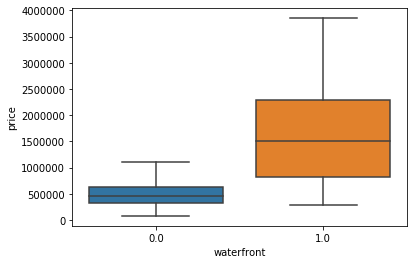

In [76]:
sns.boxplot(x = 'waterfront', y = 'price', data = df, showfliers = False)

This boxplot gives us a good idea of the difference in price between those houses with and without a view of the waterfront: the mean house price for houses with a waterfront view is much higher than the mean house price for houses without a waterfront view. The highest price for houses without a waterfront view overlap with the lowest prices for houses with a waterfront view.

**See "Data cleaning and question 1" notebook for an exploration of this question.**

**2) If I have a house with an above average grade, what factors will influence its sales price?**

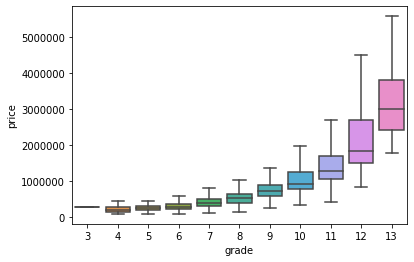

In [78]:
sns.boxplot(x = 'grade', y = 'price', data = df, showfliers = False)

As can be seen from the boxplot above, as the grade increases, so too does the price of a house.

**See "Data cleaning and question 2" notebook for an exploration of this question.**

**3) If I wish to buy a big house in the north of the city, what features will the property be likely to have?**

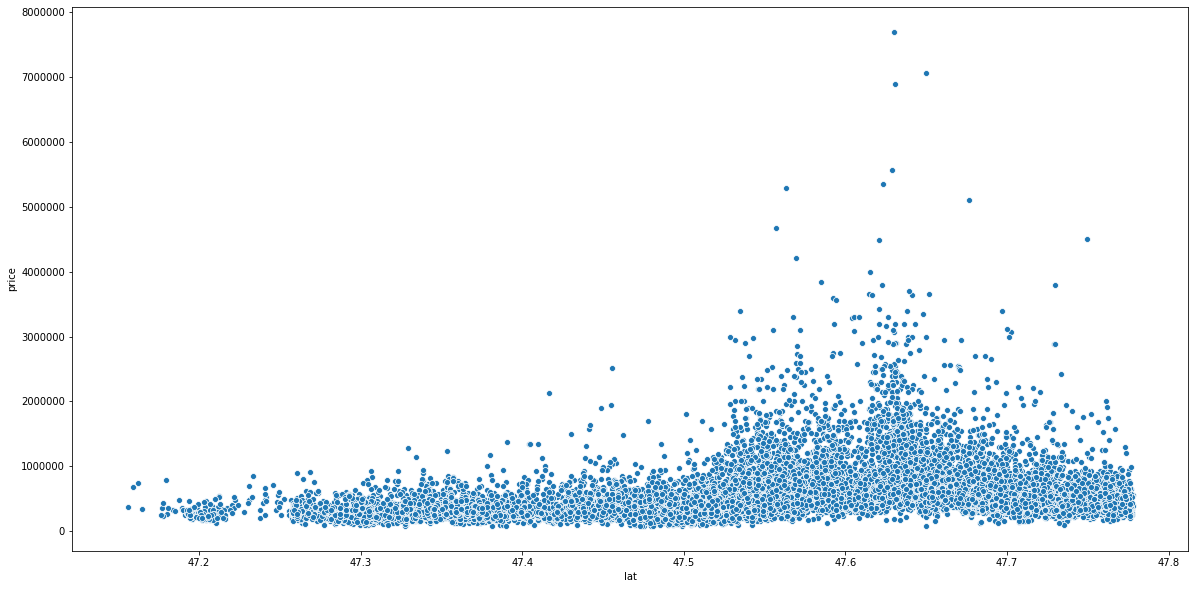

In [82]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="lat", y="price",
                      data=df)

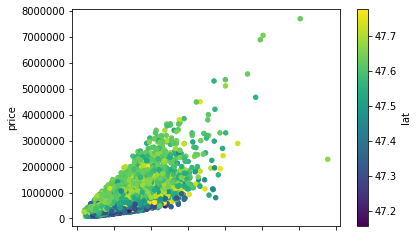

In [84]:
ax2 = df.plot.scatter(x='sqft_living',
                       y='price',
                      c='lat',
                      colormap='viridis')

This seems to suggest that as the latitude of a house increases, so too do the price and sqft living area of the house.

**Please see "Data cleaning and question 3" notebook for an exploration of this question**